In [10]:
import numpy as np
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz




from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import set_config


alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
unicorn_df = pd.read_csv("Unicorn_Clean.csv")
unicorn_df.drop(unicorn_df.columns[0], axis=1, inplace=True)
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [3]:
unicorn_df.shape

(936, 10)

In [4]:
train_df, test_df = train_test_split(unicorn_df, test_size=0.2, random_state=123)

In [5]:
unicorn_df['Investor 1'].nunique()

510

In [7]:
profile = ProfileReport(train_df, title="Pandas Profiling Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

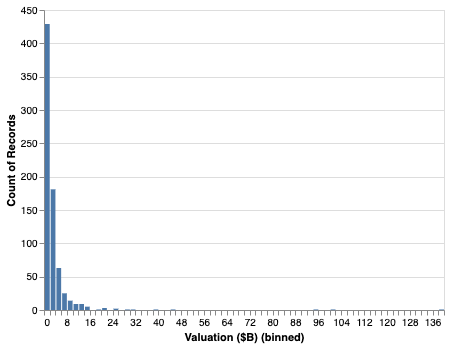

In [14]:
valuation_hist = alt.Chart(train_df).mark_bar().encode(
    alt.X('Valuation ($B)', bin=alt.Bin(maxbins=100)),
    y='count()')

# Show the plot
valuation_hist